<a href="https://colab.research.google.com/github/MinghanChu/DeepLearning-ZerosToGans/blob/main/Image_Classification_with_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring the CIFAR10 Dataset

we trained a feedfoward neural networks with **a single hidden layer** to classify handwritten digits from the [MNIST dataset](http://yann.lecun.com/exdb/mnist) with over **97%** accuracy. For this tutorial, we'll use the **CIFAR10 dataset**, which consists of `60000 32x32` px colour images in `10` classes. Here are some sample images from the dataset:

<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:480px">

In [2]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [24]:
project_name='05-cifar10-cnn'

Download images

In [3]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

100%|██████████| 135107811/135107811 [00:02<00:00, 49841077.47it/s]


In [4]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

The dataset is extracted to the directory `data/cifar10`. It contains 2 folders `train` and `test`, containing the training set (50000 images) and test set (10000 images) respectively. Each of them contains 10 folders, one for each class of images. Let's verify this using `os.listdir`.

`data_dir + "/train"`: This concatenates the value of `data_dir` with the string `"/train"`. The result is string that represents the path to the `train` subdirectory within the `data_dir` directory.

**For example**: If data_dir is `"/home/user/dataset"`, then `data_dir + "/train"` becomes `"/home/user/dataset/train"`. The `os.listdir()` function will list all the files and directories inside `"/home/user/dataset/train"`.

In [5]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['automobile', 'ship', 'frog', 'cat', 'airplane', 'deer', 'dog', 'truck', 'horse', 'bird']


Let's look inside a couple of folders, one from the **training set** and another from the **test set**. As an exercise, you can verify that that there are an equal number of images for each class, 5000 in the training set and 1000 in the test set.

In [6]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['2780.png', '0792.png', '2230.png', '2255.png', '3987.png']


In [7]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files)

No. of test examples for ship: 1000
['0792.png', '0196.png', '0086.png', '0080.png', '0229.png', '0459.png', '0482.png', '0814.png', '0973.png', '0310.png', '0079.png', '0694.png', '0221.png', '0244.png', '0704.png', '0474.png', '0308.png', '0586.png', '0654.png', '0481.png', '0990.png', '0569.png', '0812.png', '0658.png', '0885.png', '0594.png', '0360.png', '0550.png', '0325.png', '0809.png', '0182.png', '0922.png', '0398.png', '0190.png', '0897.png', '0218.png', '0255.png', '0443.png', '0322.png', '0933.png', '0170.png', '0744.png', '0157.png', '0559.png', '0494.png', '0397.png', '0292.png', '0531.png', '0946.png', '0622.png', '0311.png', '0745.png', '0769.png', '0226.png', '0952.png', '0021.png', '0248.png', '0313.png', '0010.png', '0304.png', '0392.png', '0930.png', '0731.png', '0493.png', '0533.png', '0412.png', '0850.png', '0787.png', '0442.png', '0046.png', '0927.png', '0909.png', '0425.png', '0359.png', '0139.png', '0716.png', '0708.png', '0919.png', '0163.png', '0996.png', '08

The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

`torchvision` is a package in the PyTorch library specifically designed to handle **computer vision tasks**. It provides a wide range of utilities and pre-trained models for tasks such as **image classification, object detection, segmentation, and more**.

In [8]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [9]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

Let's look at a sample element from the **training dataset**. Each element is a `tuple`, containing an image tensor and a label. Since the data consists of `32x32 px` color images with 3 channels (RGB), each image tensor has the shape `(3, 32, 32)`.

In [11]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

The list of classes is stored in the `.classes` property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

In [12]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(32,32,3)`.

+ `matplotlib.rcParams`: `rcParams` is a dictionary-like object in `Matplotlib` that stores default configuration settings for various aspects of plot appearance and behavior. (Note `matplotlib` is a Python module)

+ `['figure.facecolor']`: This part of the statement accesses the configuration setting for the background color (facecolor) of Matplotlib figures (figure)

+ = `'#ffffff'`: This part assigns the hexadecimal color code `'#ffffff'` to the 'figure.facecolor' configuration setting. The hexadecimal color code `'#ffffff'` represents white.

In [14]:
from io import IncrementalNewlineDecoder
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'



In [15]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Next check a couple of images from the `dataset`. As you can tell, the 32x32px images are quite difficult to identify, even for the human eye.

`*dataset[0]`: This syntax `*dataset[0]` is known as unpacking. Here, it's unpacking the contents of `dataset[0]`, assuming `dataset[0]` contains an iterable, like a `tuple` or a `list`. Each element in the iterable will be passed as an argument to the `show_example` function.

In Python, when you pass an **iterable** (like a `list` or `tuple`) to a function as an argument, it's treated as a single entity, even if it contains multiple elements.

+ Here, `dataset[0]` is assumed to be an iterable (like a tuple), containing multiple elements (for example, an image and its label).

+ The asterisk `(*)` operator before dataset`[0]` unpacks the elements of the iterable. So if `dataset[0]` is `(image, label)`, it effectively becomes `show_example(image, label)`, passing each element as a **separate argument** to the show_example function.

Label:  airplane (0)


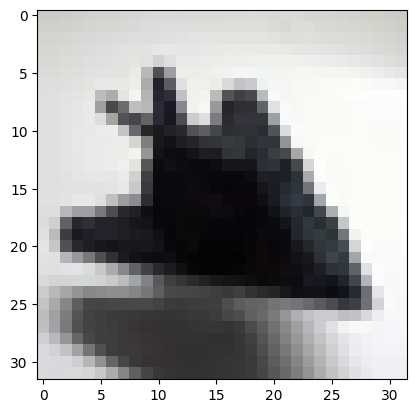

In [18]:
show_example(*dataset[0])

Label:  airplane (0)


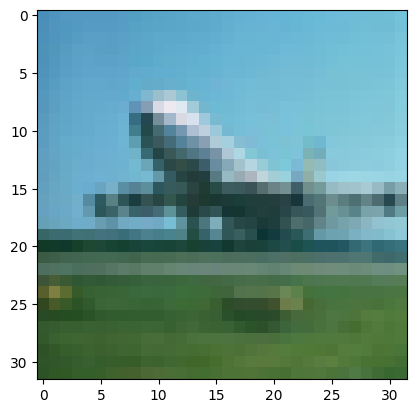

In [19]:
show_example(*dataset[100])

### Save and upload your notebook


In [20]:
!pip install jovian --upgrade -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [21]:
import jovian

In [25]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
